In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Nepal_Development_Indicator_Trends.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Nepal,NPL,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,2.031891e+00,2.020983e+00,2.146355e+00,2.189230e+00,2.210006e+00,2.285616e+00,NaN,NaN,NaN,NaN
1,Nepal,NPL,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.400000e+04,2.623000e+06,3.100000e+04,3.840000e+05,1.200000e+04,1.210000e+05,4.800000e+04,3.200000e+04,9.300000e+04,NaN
2,Nepal,NPL,"Voice and Accountability: Percentile Rank, Upp...",VA.PER.RNK.UPPER,NaN,NaN,NaN,NaN,NaN,NaN,...,3.940887e+01,4.039409e+01,4.482759e+01,4.630542e+01,5.000000e+01,4.830918e+01,5.265701e+01,5.169082e+01,5.362319e+01,NaN
3,Nepal,NPL,Voice and Accountability: Estimate,VA.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.304457e-01,-4.154308e-01,-2.513827e-01,-1.995158e-01,-1.296913e-01,-1.500543e-01,-8.403878e-02,-8.446476e-02,-4.915940e-02,NaN
4,Nepal,NPL,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.400040e+06,2.850013e+06,4.241244e+06,5.993524e+06,3.263597e+06,5.285142e+06,9.513473e+06,6.433383e+06,3.330281e+06,NaN


In [3]:
df.shape

(1478, 68)

In [4]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [5]:
# Count the number of duplicate rows
duplicate_row_count = df.duplicated().sum()

print("Number of duplicate rows:", duplicate_row_count)

Number of duplicate rows: 0


In [6]:
# Extract the first row of data
first_row = df.iloc[0]
print(first_row)

Country Name                                           Nepal
Country Code                                             NPL
Indicator Name    Intentional homicides (per 100,000 people)
Indicator Code                                VC.IHR.PSRC.P5
1960                                                     NaN
                                     ...                    
2019                                                2.285616
2020                                                     NaN
2021                                                     NaN
2022                                                     NaN
2023                                                     NaN
Name: 0, Length: 68, dtype: object


In [7]:
def extract_row_info(df, row_index):
    # Extract the specified row of data
    row_data = df.iloc[row_index]

    # Extract the title (Series Name)
    title = row_data['Indicator Name']

    # Extract the data
    data = {col: row_data[col] for col in row_data.index[4:] if row_data[col] not in ('..', 'NaN', '')}

    # Convert numeric values to integers
    data = {col: float(value) if pd.notnull(value) and value not in ('..', 'NaN', '') else None for col, value in data.items()}

    # Extract years and values from the data dictionary
    years = []
    values = []
    for col, value in data.items():
        try:
            year = int(col.split(' ')[0])
            years.append(year)
            values.append(value)
        except ValueError:
            pass

    return title, data, years, values

def plot_data(years, values, title):
      plt.figure(figsize=(8, 4))
      plt.plot(years, values, marker='o', linestyle='-', color='b')

      plt.title(f'{title} in Nepal')
      plt.xlabel('Year')
      plt.ylabel('Values')
      plt.xticks(rotation=45)
      plt.grid(True)
      plt.tight_layout()
      #plt.savefig(f'{output_folder}/{title}.png')
      plt.show()


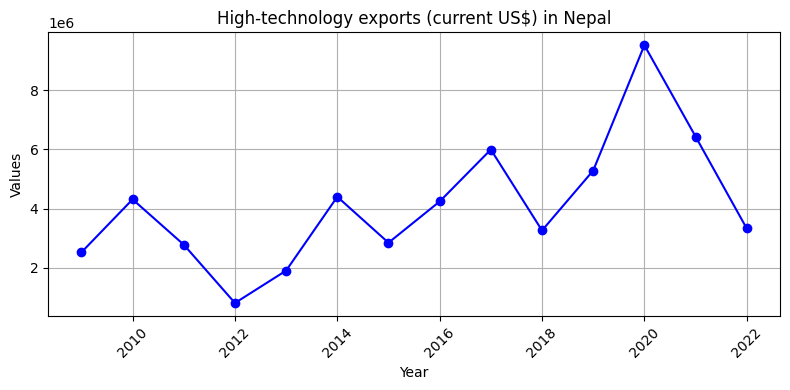

In [8]:
# import os

# # Define the output folder
# output_folder = '/content/output'

# # Create the output folder if it doesn't exist
# os.makedirs(output_folder, exist_ok=True)

# Extract information for the current row
title, data, years, values = extract_row_info(df, 4)

# Plot the data
plot_data(years, values, title)

# Display the plot
plt.show()

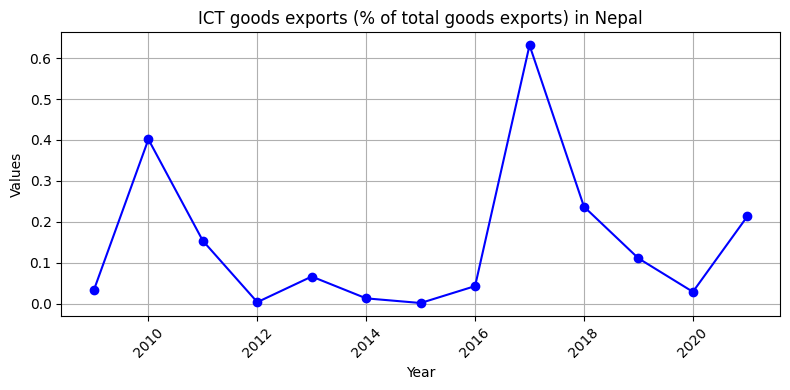

In [9]:
# Extract information for the given row index
title, data, years, values = extract_row_info(df, 9)
plot_data(years, values, title)

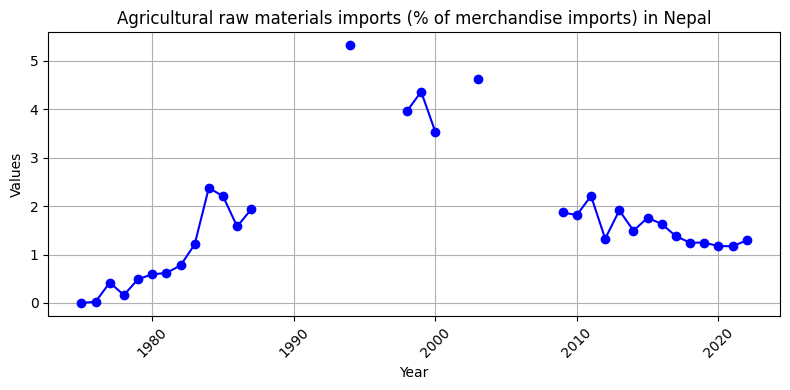

In [10]:
title, data, years, values = extract_row_info(df, 17)
plot_data(years, values, title)

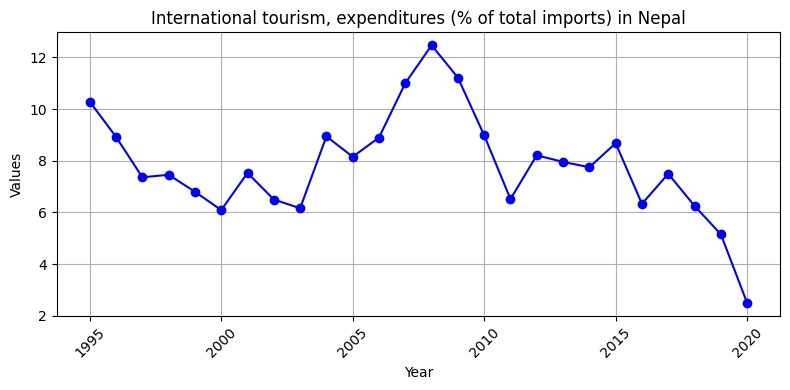

In [11]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 24)
plot_data(years, values, title)

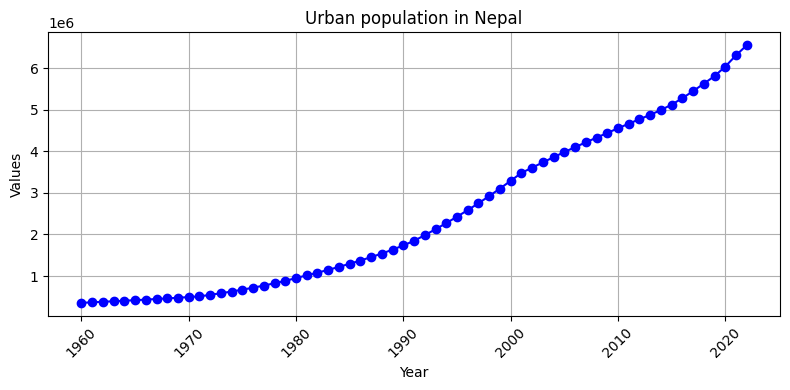

In [12]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 27)
plot_data(years, values, title)

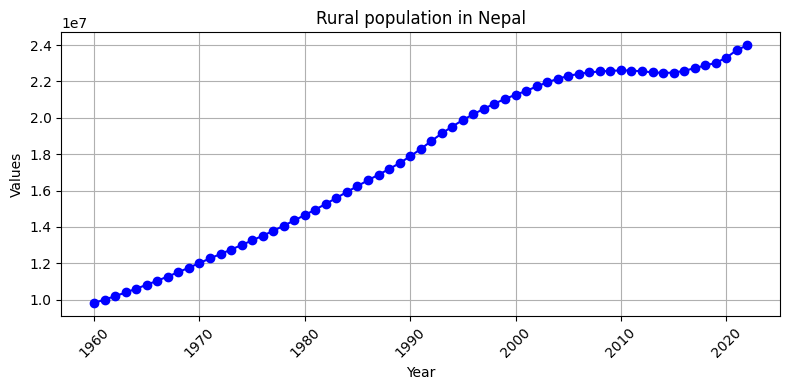

In [13]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 28)
plot_data(years, values, title)

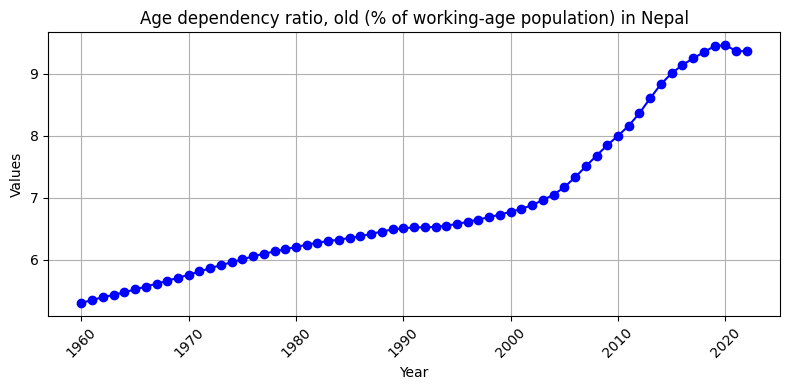

In [14]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 32)
plot_data(years, values, title)

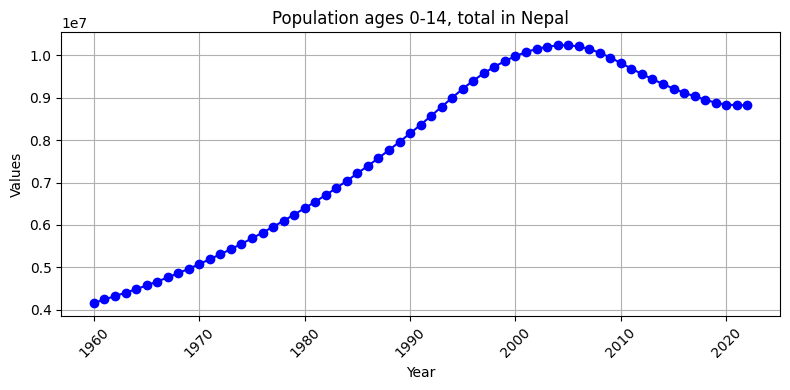

In [15]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 44)
plot_data(years, values, title)

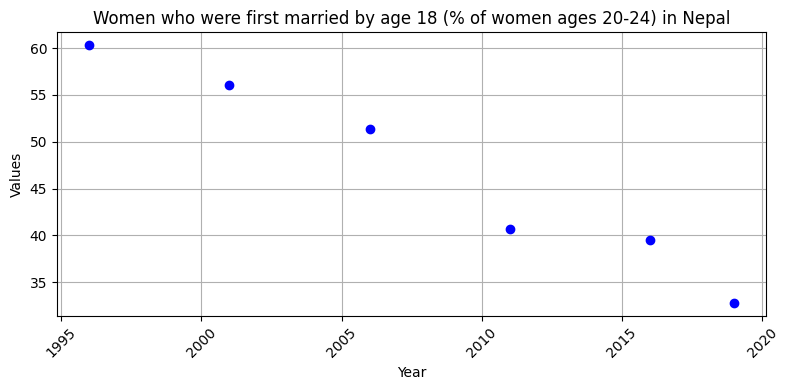

In [16]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 46)
plot_data(years, values, title)

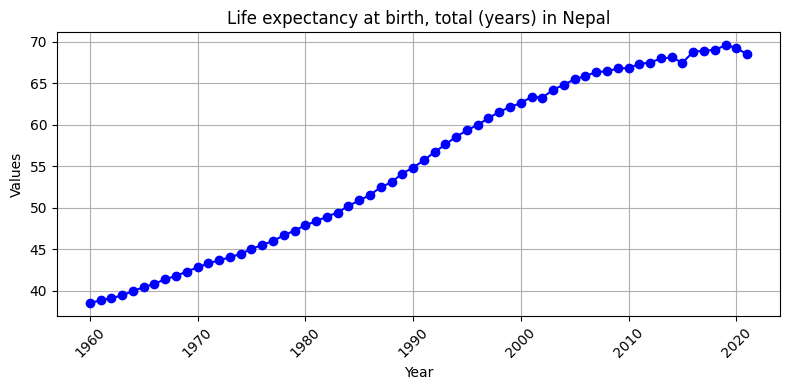

In [17]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 48)
plot_data(years, values, title)

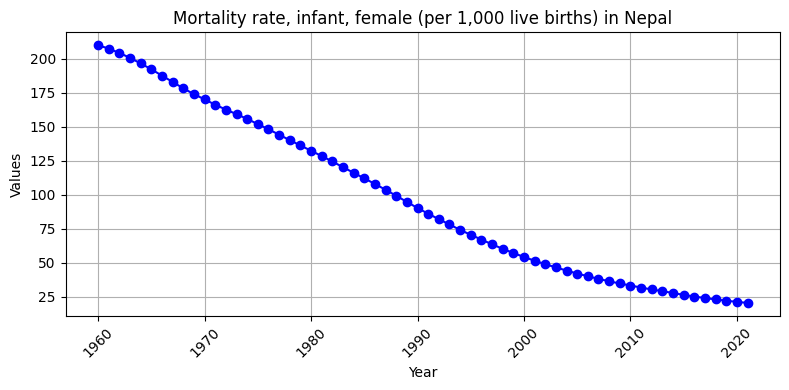

In [18]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 49)
plot_data(years, values, title)

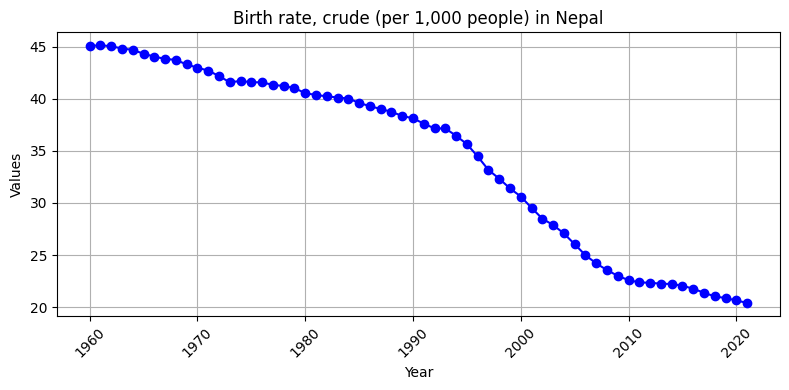

In [19]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 50)
plot_data(years, values, title)

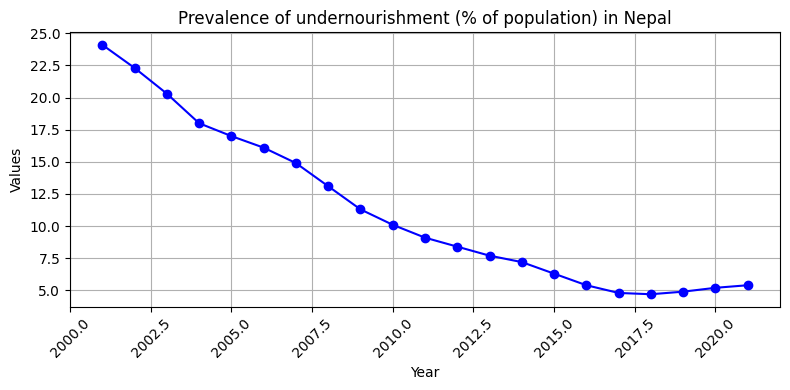

In [20]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 52)
plot_data(years, values, title)

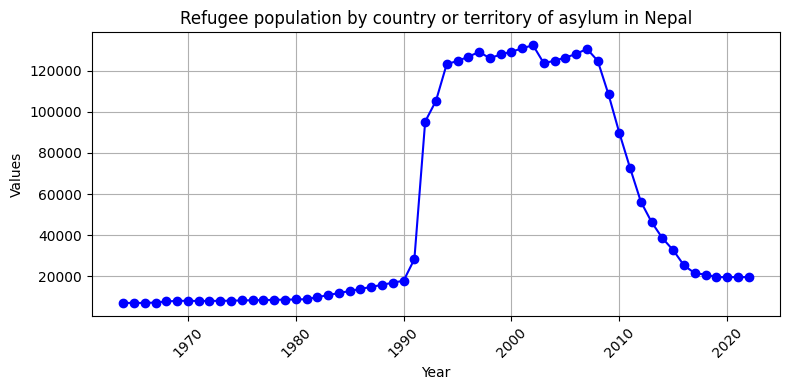

In [21]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 53)
plot_data(years, values, title)

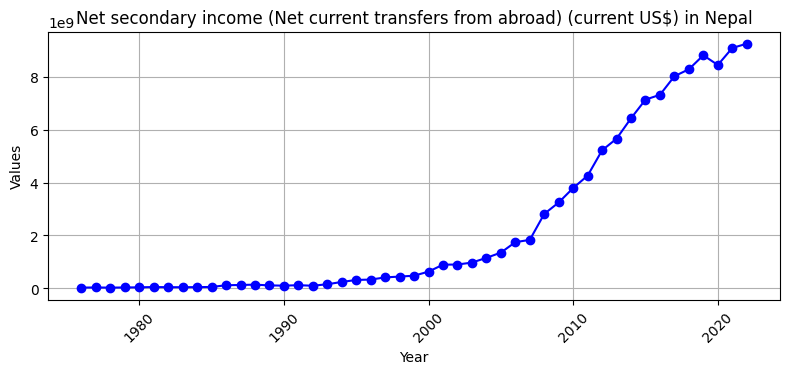

In [22]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 69)
plot_data(years, values, title)

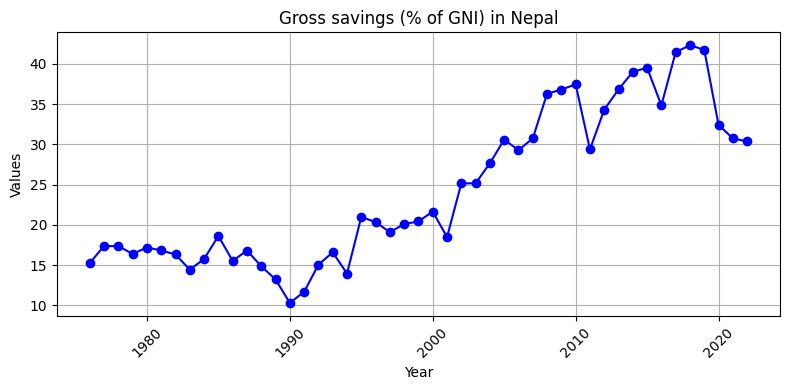

In [23]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 71)
plot_data(years, values, title)

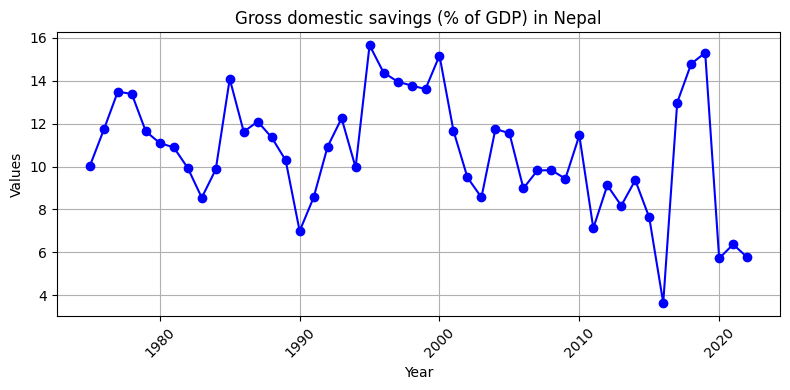

In [24]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 76)
plot_data(years, values, title)

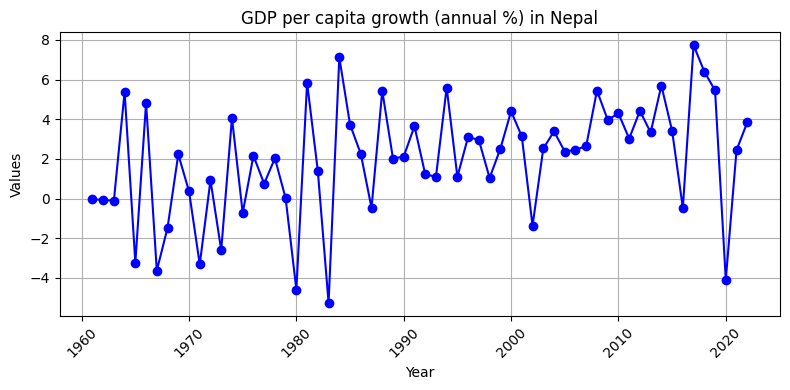

In [25]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 78)
plot_data(years, values, title)

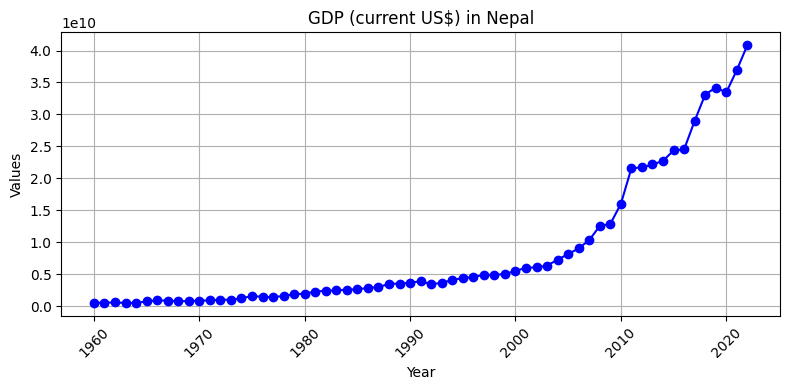

In [26]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 81)
plot_data(years, values, title)

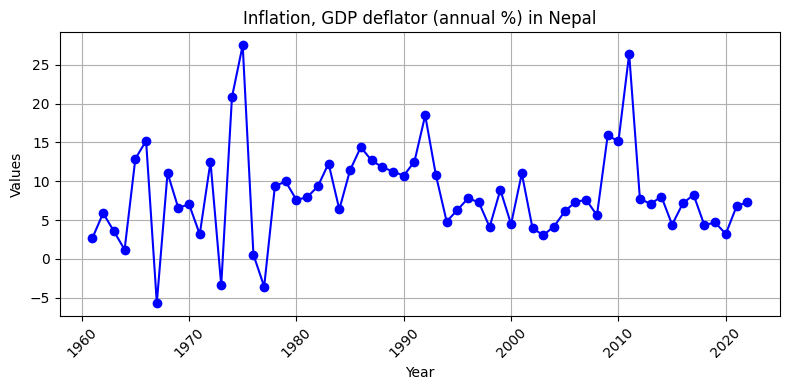

In [27]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 84)
plot_data(years, values, title)

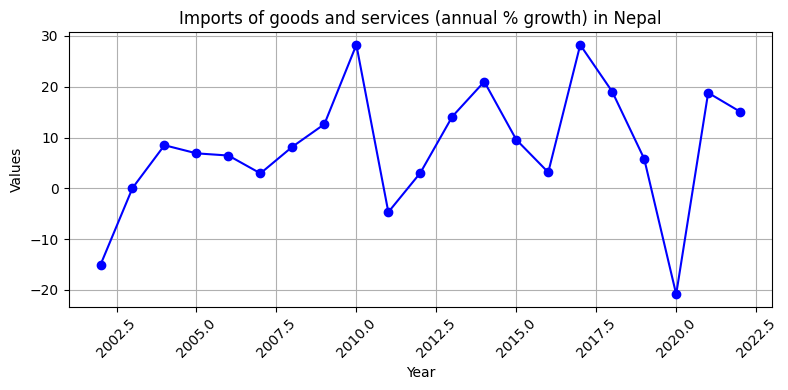

In [28]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 103)
plot_data(years, values, title)

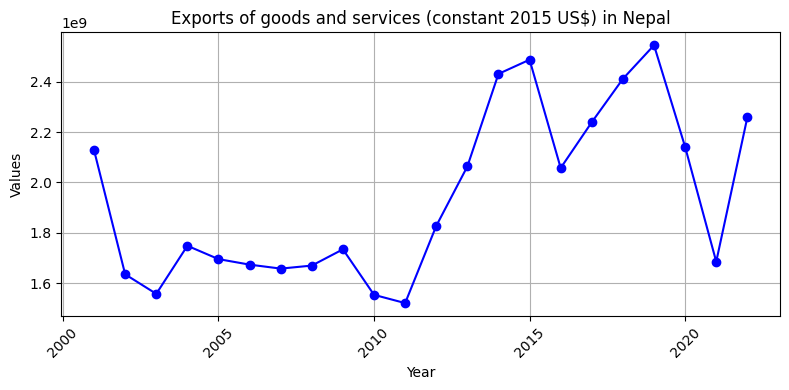

In [29]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 109)
plot_data(years, values, title)

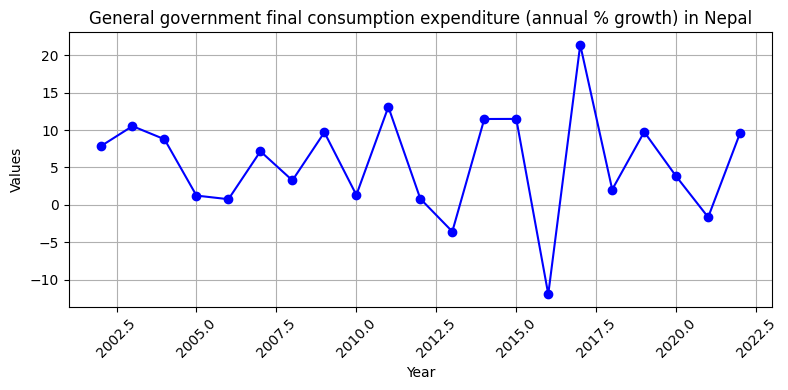

In [30]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 116)
plot_data(years, values, title)

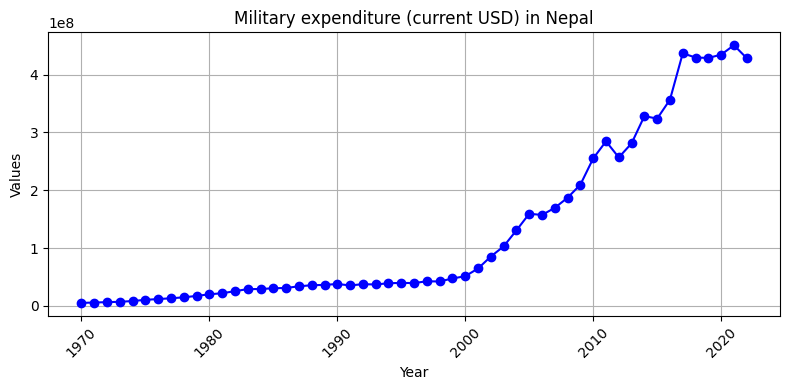

In [31]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 118)
plot_data(years, values, title)

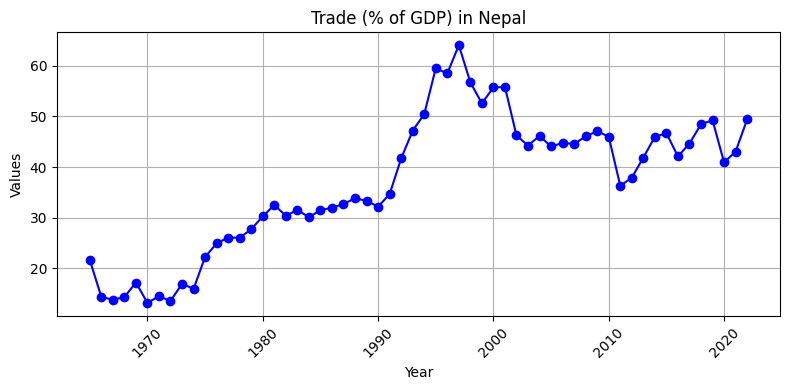

In [32]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 184)
plot_data(years, values, title)

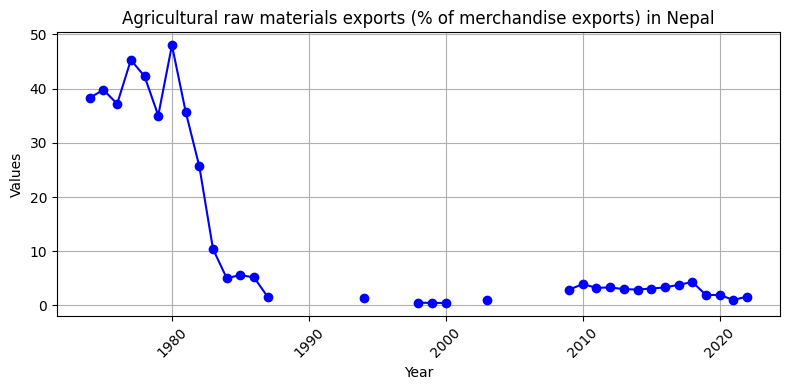

In [33]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 194)
plot_data(years, values, title)

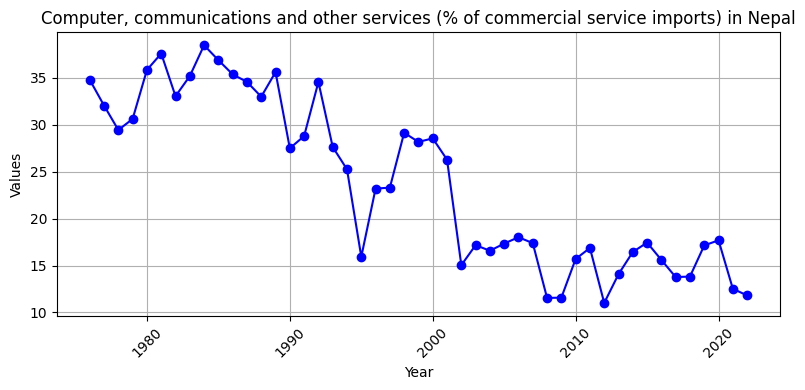

In [34]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 196)
plot_data(years, values, title)

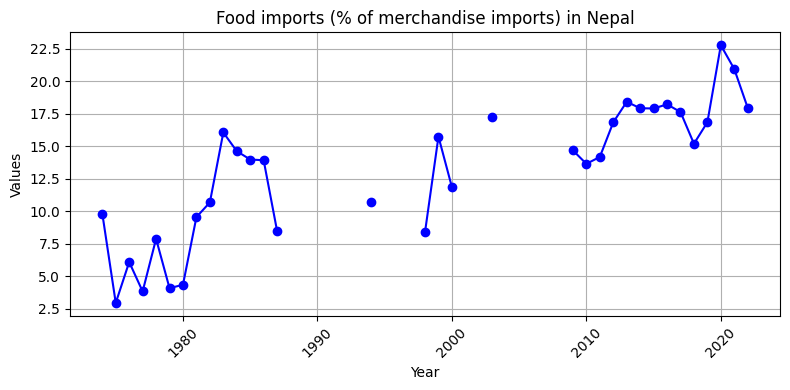

In [35]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 201)
plot_data(years, values, title)

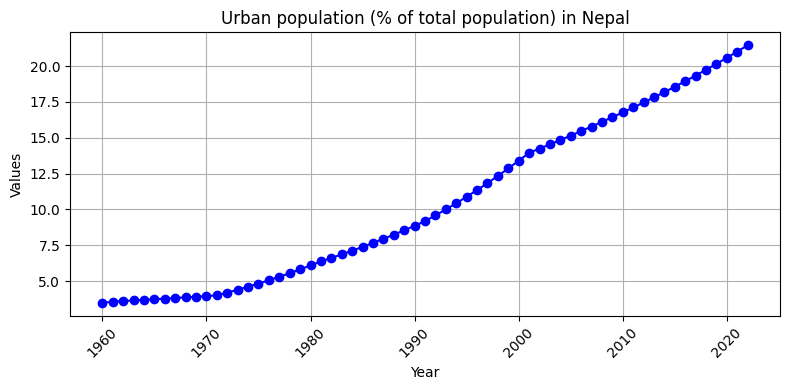

In [36]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 211)
plot_data(years, values, title)

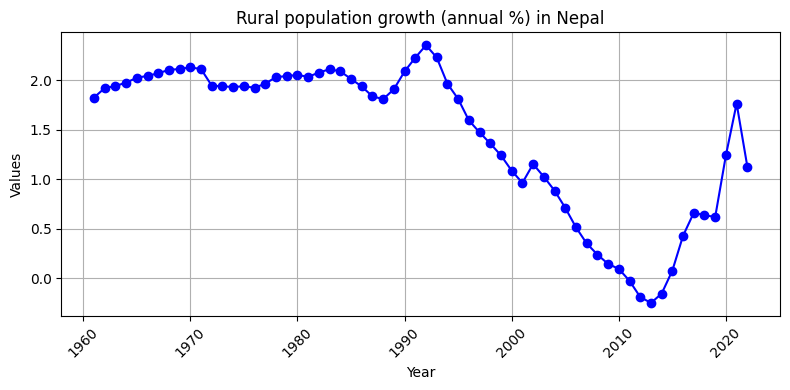

In [37]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 212)
plot_data(years, values, title)

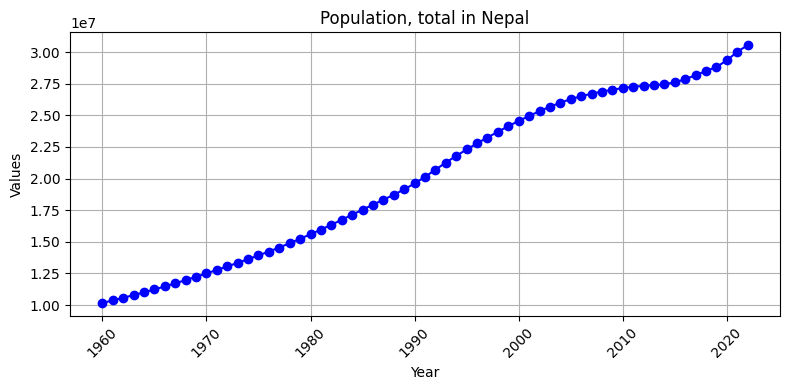

In [38]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 215)
plot_data(years, values, title)

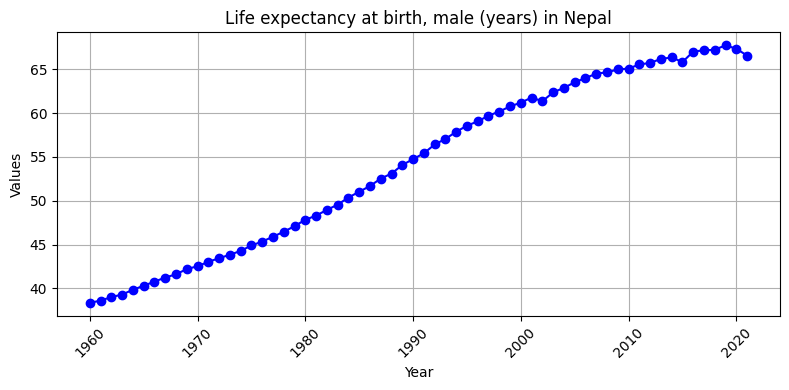

In [39]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 232)
plot_data(years, values, title)

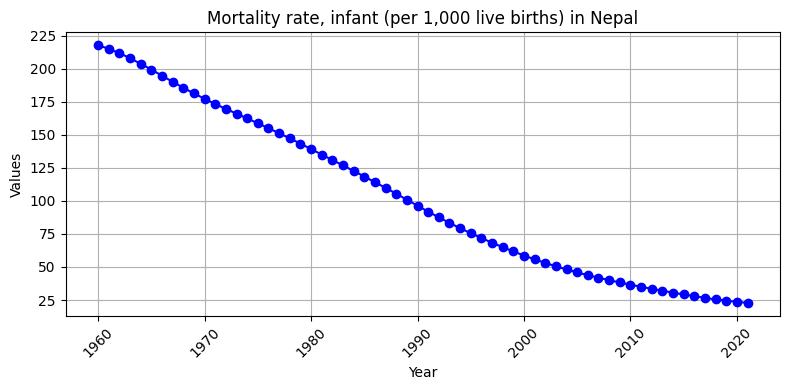

In [40]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 233)
plot_data(years, values, title)

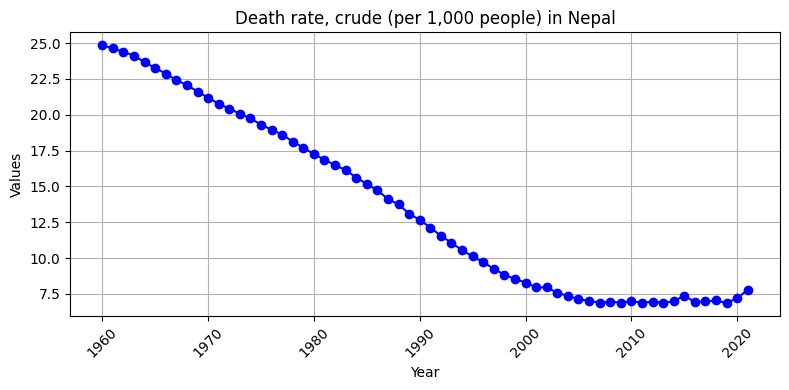

In [41]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 234)
plot_data(years, values, title)

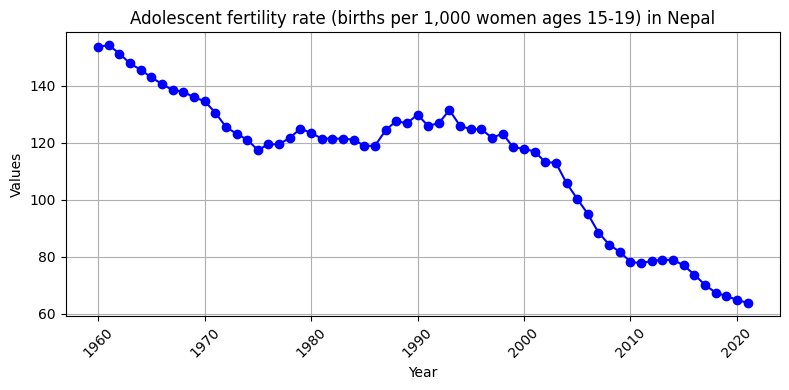

In [42]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 235)
plot_data(years, values, title)

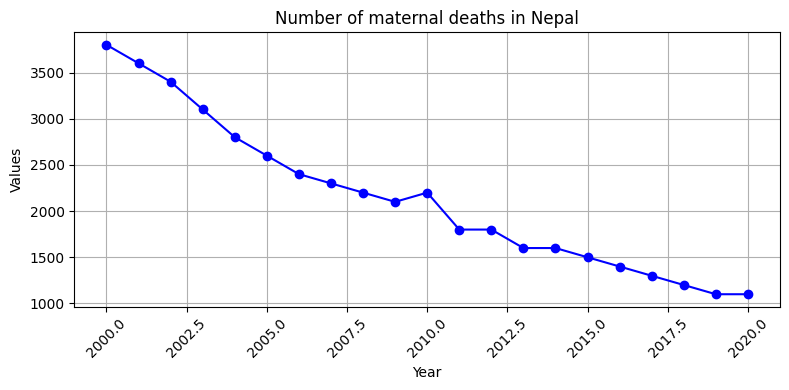

In [43]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 245)
plot_data(years, values, title)

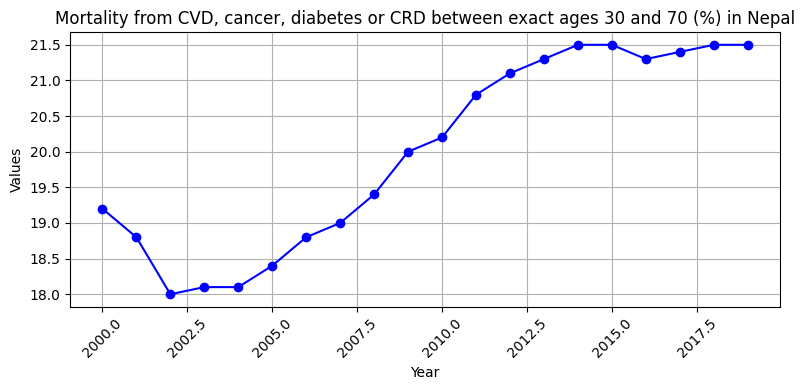

In [44]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 253)
plot_data(years, values, title)

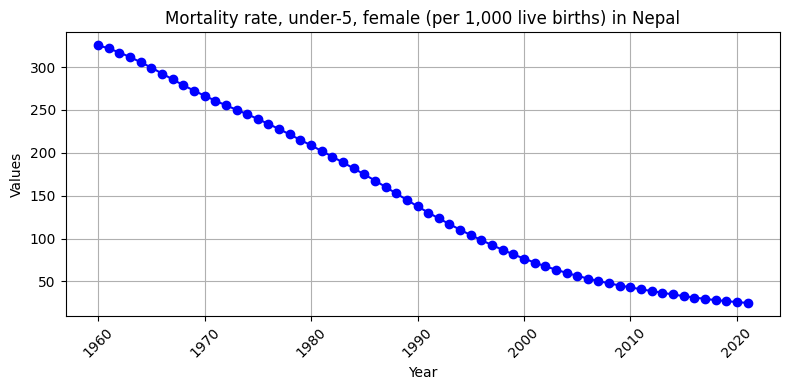

In [45]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 254)
plot_data(years, values, title)

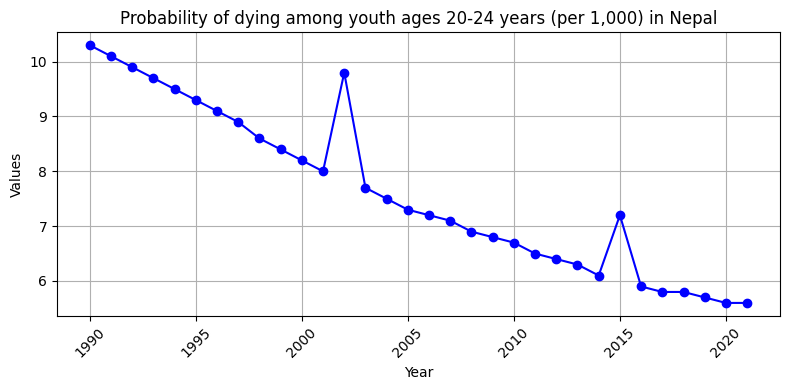

In [46]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 255)
plot_data(years, values, title)

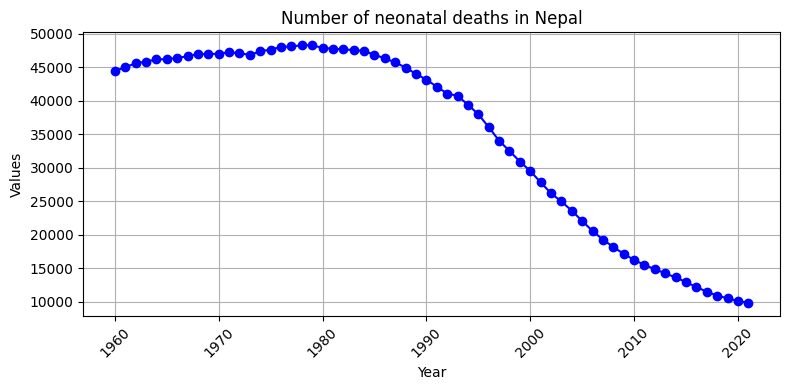

In [47]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 256)
plot_data(years, values, title)

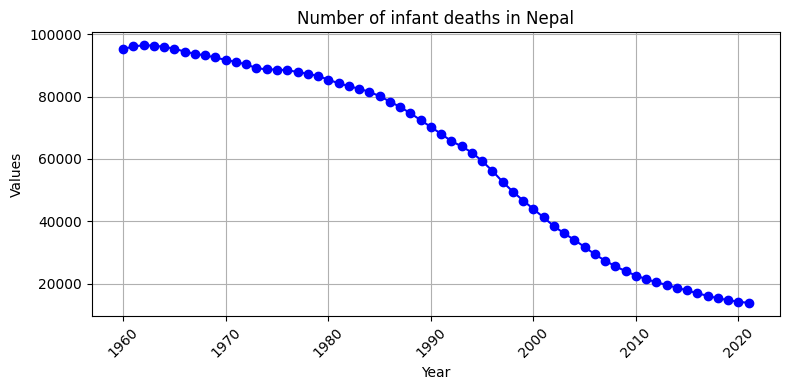

In [48]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 257)
plot_data(years, values, title)

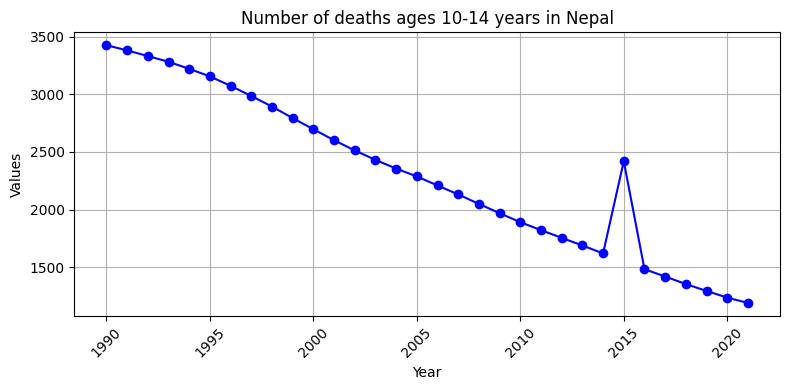

In [49]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 258)
plot_data(years, values, title)

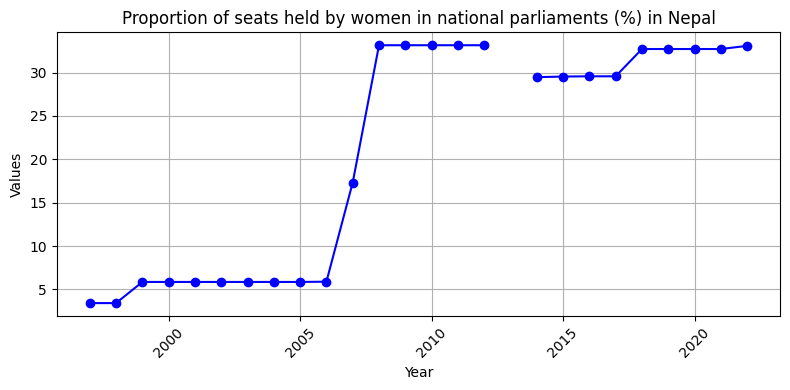

In [50]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 263)
plot_data(years, values, title)

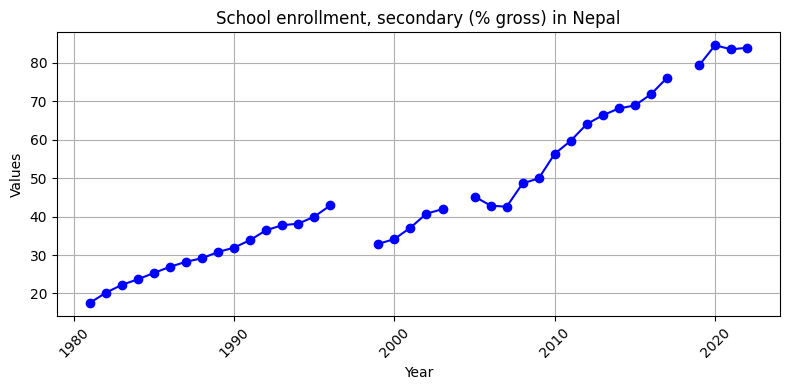

In [51]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 277)
plot_data(years, values, title)

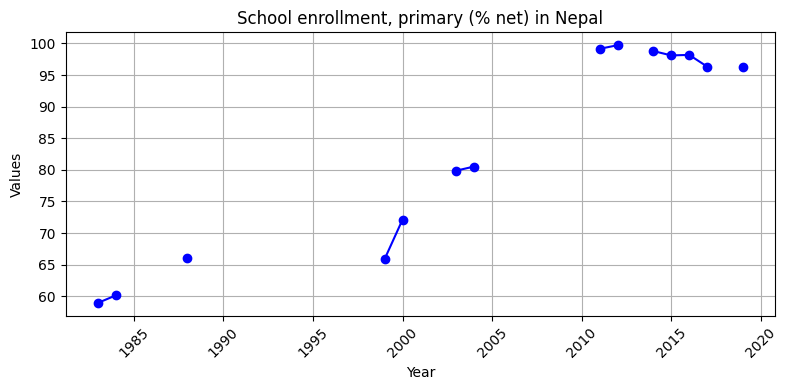

In [52]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 291)
plot_data(years, values, title)

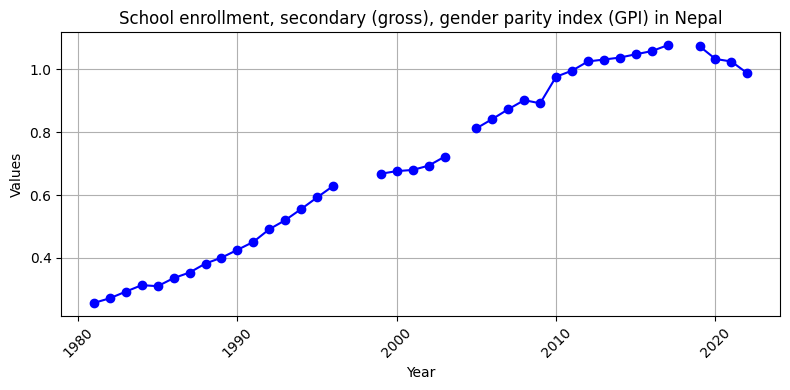

In [53]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 300)
plot_data(years, values, title)

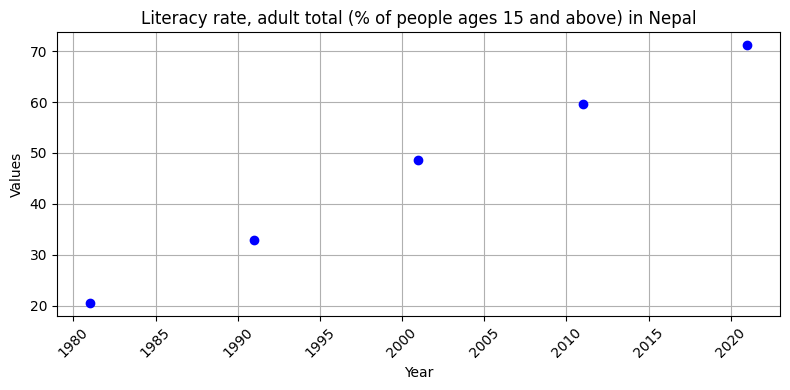

In [54]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 301)
plot_data(years, values, title)

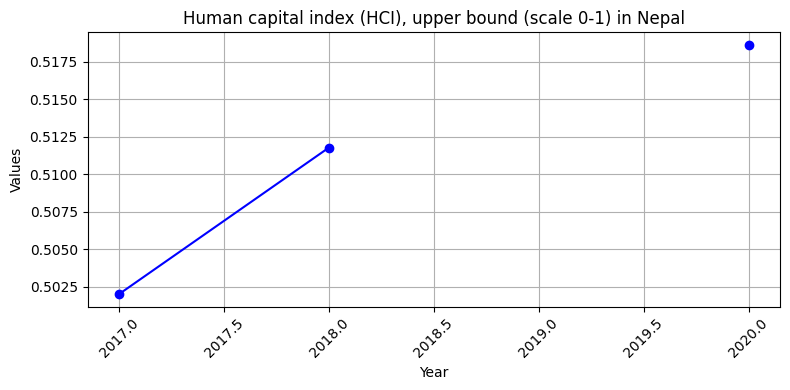

In [55]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 319)
plot_data(years, values, title)

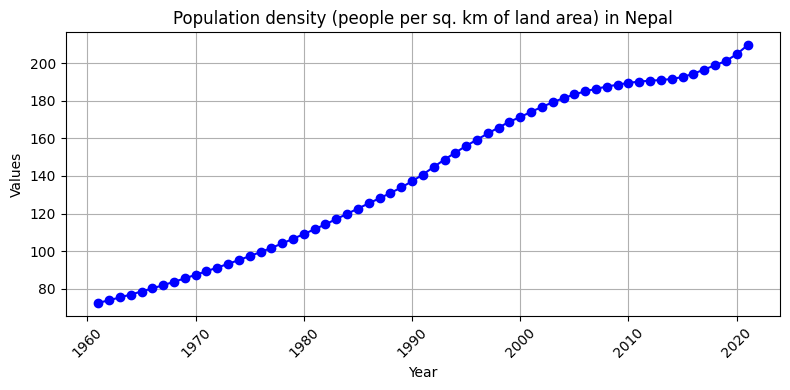

In [56]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 351)
plot_data(years, values, title)

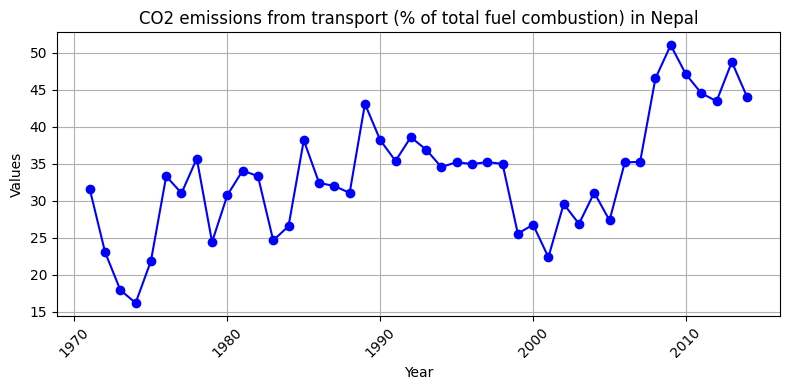

In [57]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 352)
plot_data(years, values, title)

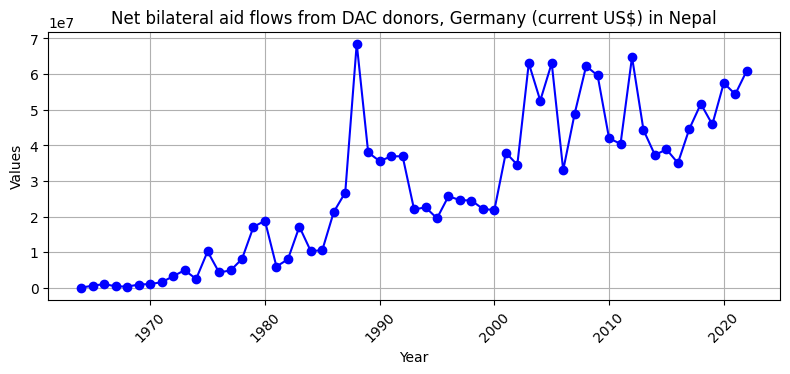

In [58]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 368)
plot_data(years, values, title)

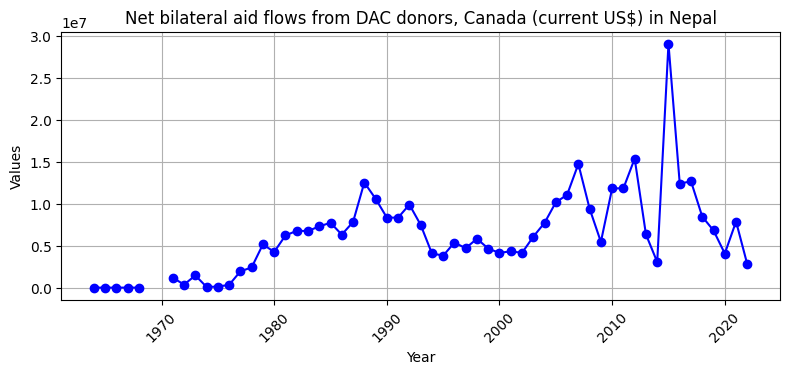

In [59]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 369)
plot_data(years, values, title)

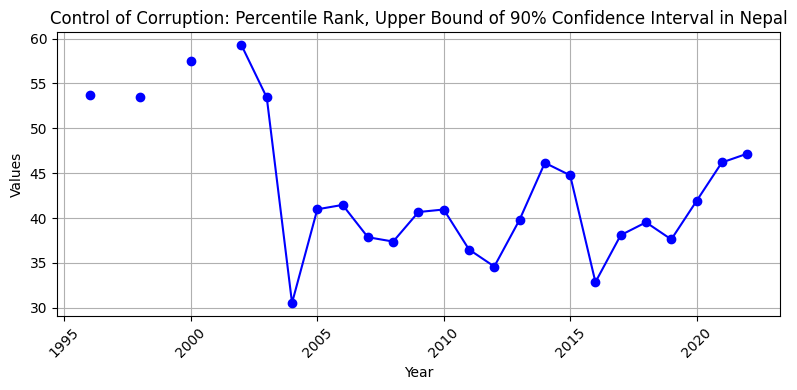

In [60]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 372)
plot_data(years, values, title)

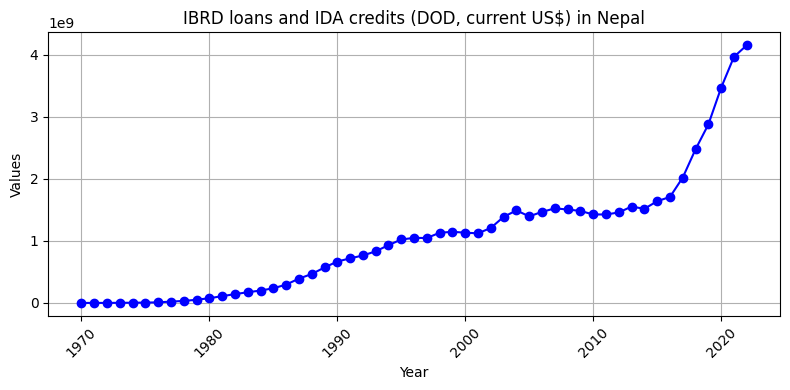

In [61]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 407)
plot_data(years, values, title)

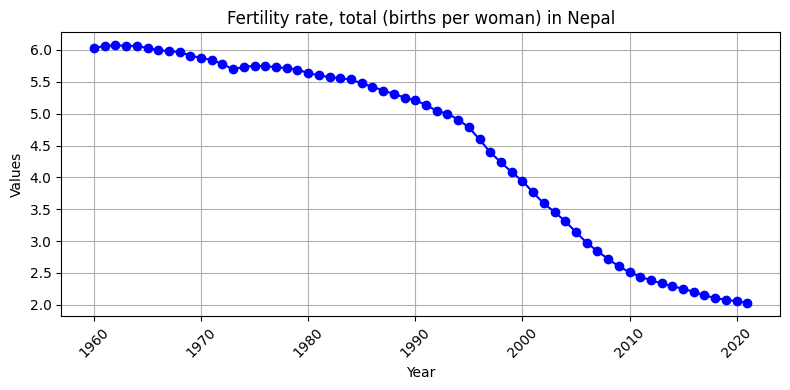

In [62]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 460)
plot_data(years, values, title)

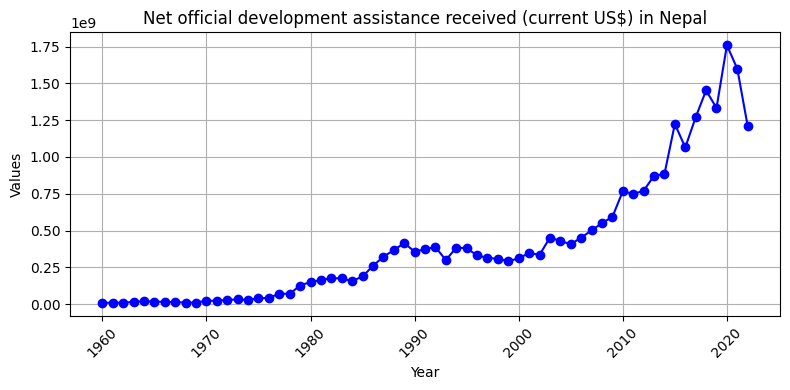

In [63]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 520)
plot_data(years, values, title)

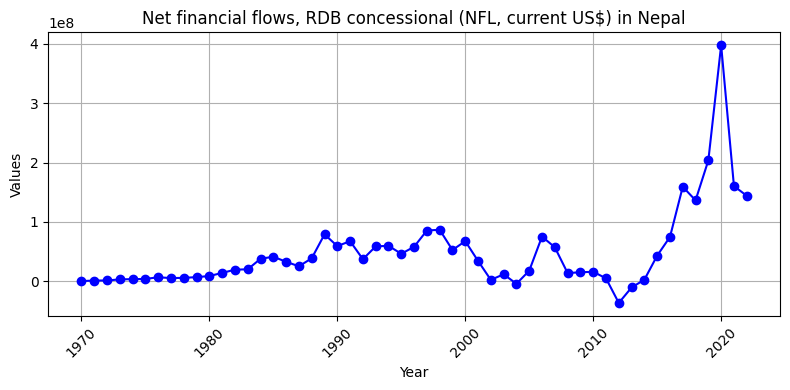

In [64]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 525)
plot_data(years, values, title)

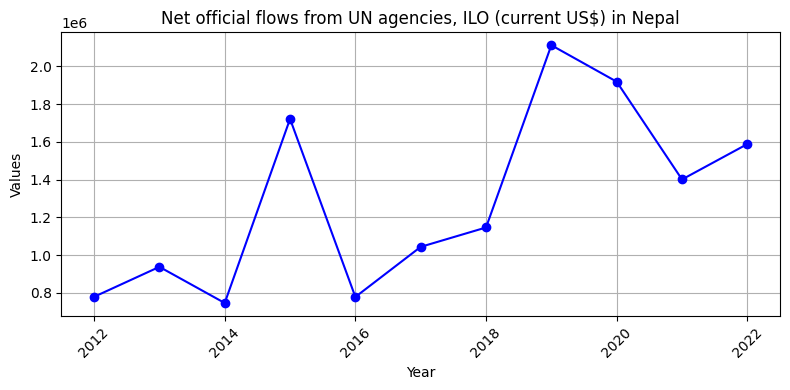

In [65]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 529)
plot_data(years, values, title)

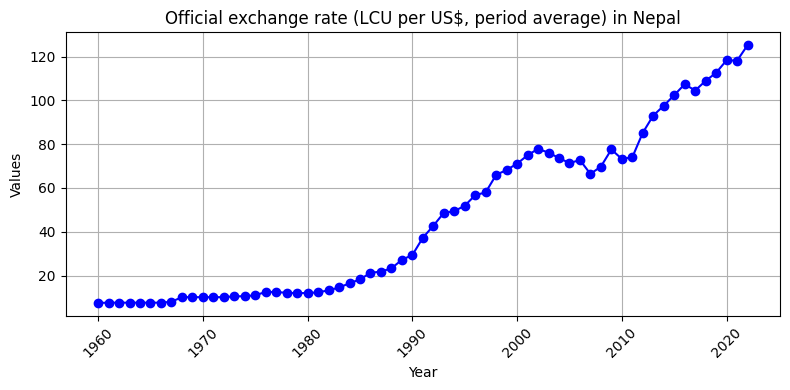

In [66]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 592)
plot_data(years, values, title)

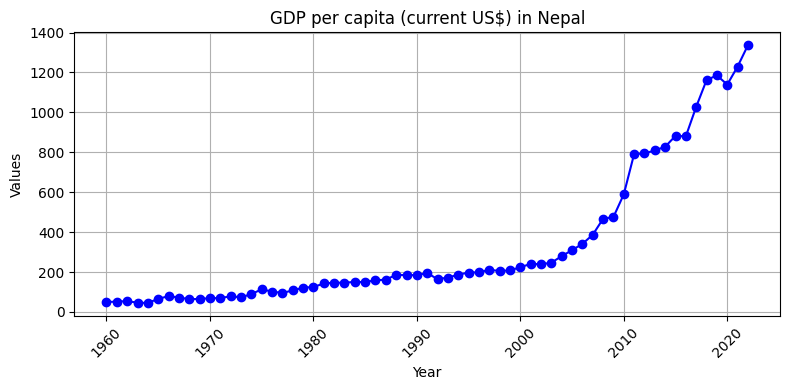

In [67]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 603)
plot_data(years, values, title)

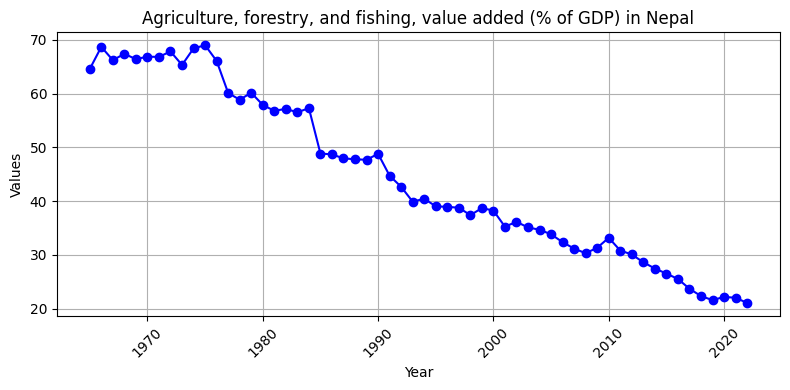

In [68]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 623)
plot_data(years, values, title)

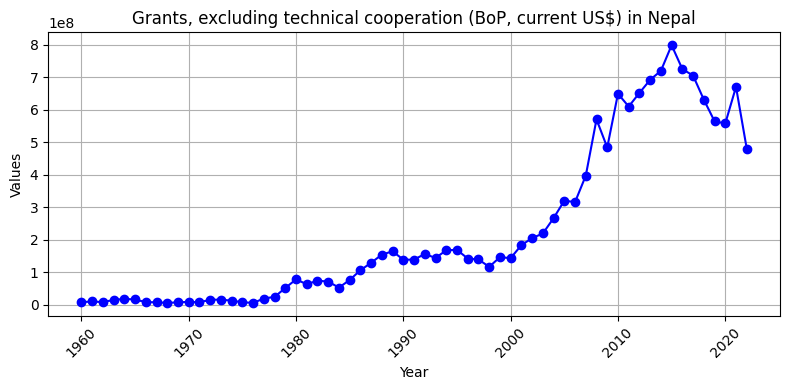

In [69]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 649)
plot_data(years, values, title)

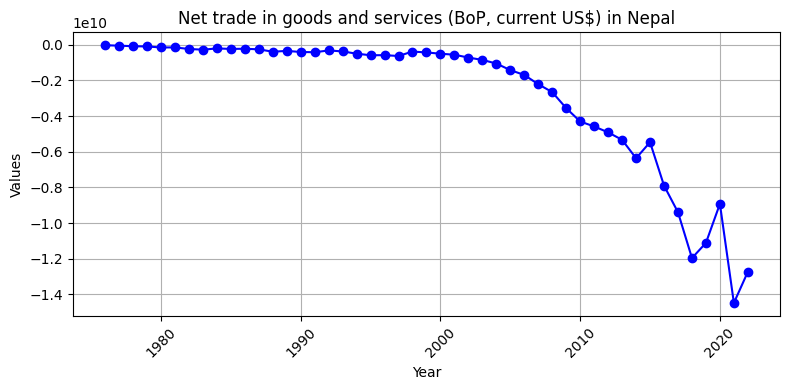

In [70]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 651)
plot_data(years, values, title)

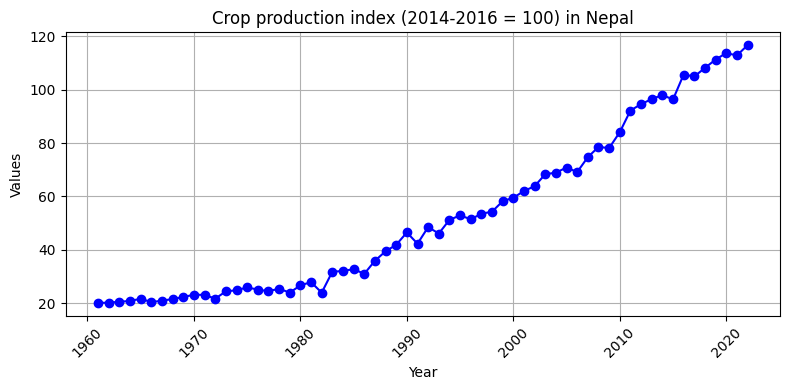

In [71]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 657)
plot_data(years, values, title)

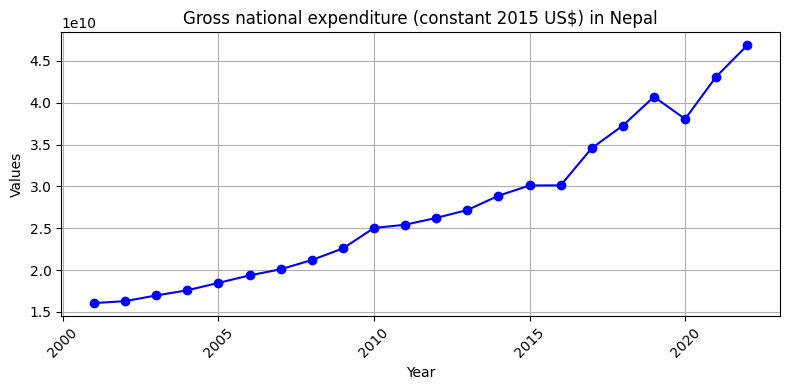

In [72]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 667)
plot_data(years, values, title)

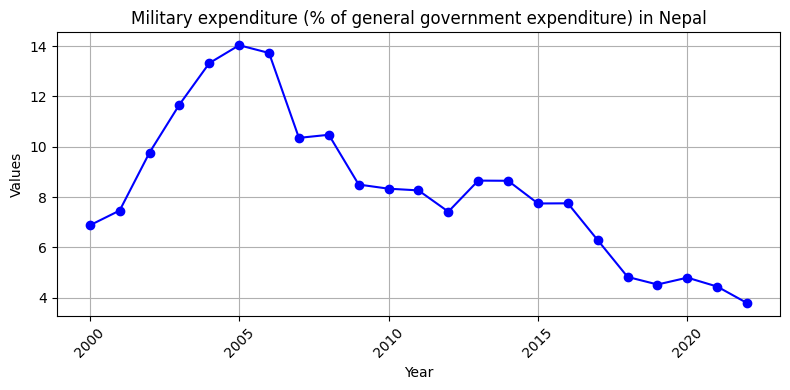

In [73]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 674)
plot_data(years, values, title)

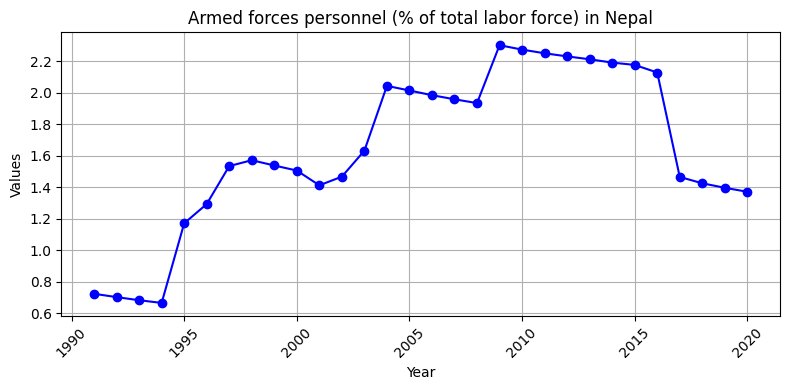

In [74]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 675)
plot_data(years, values, title)

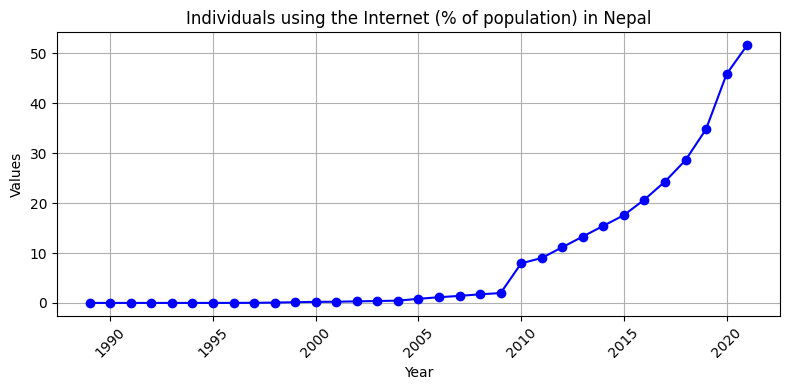

In [75]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 678)
plot_data(years, values, title)

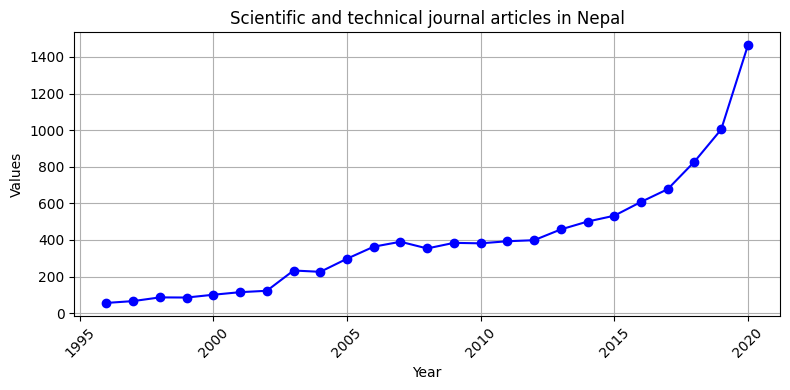

In [76]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 691)
plot_data(years, values, title)

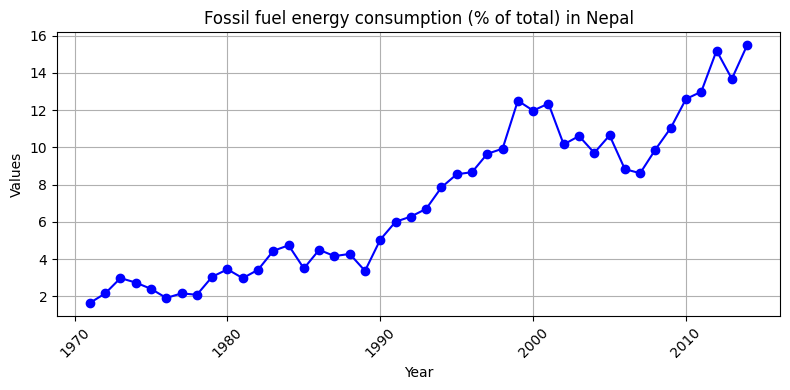

In [77]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 701)
plot_data(years, values, title)

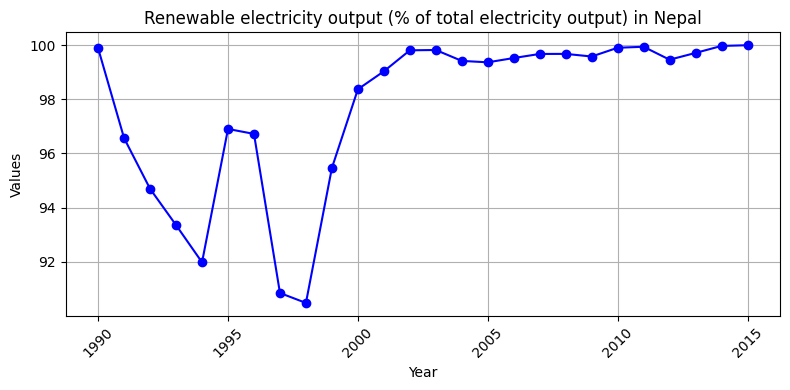

In [78]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 703)
plot_data(years, values, title)

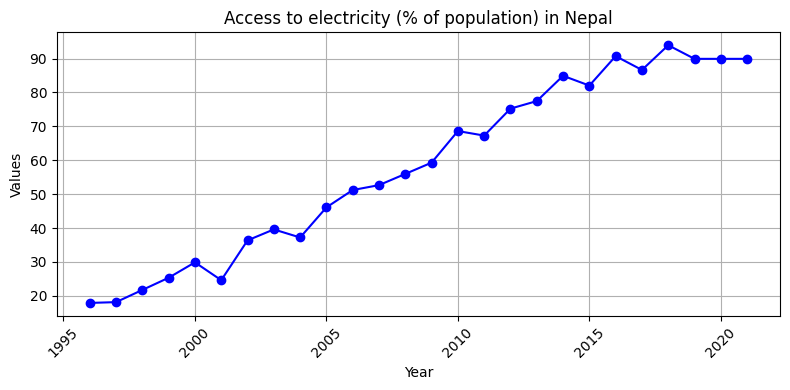

In [79]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 705)
plot_data(years, values, title)

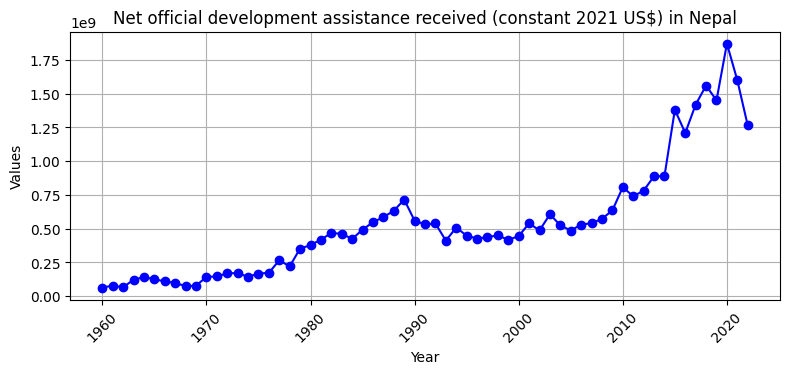

In [80]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 710)
plot_data(years, values, title)

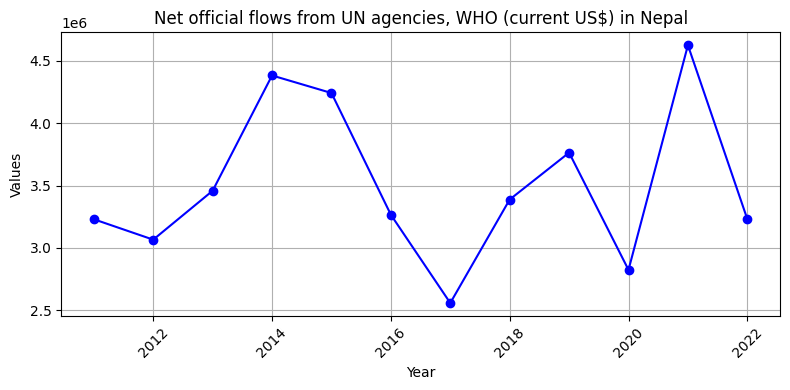

In [81]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 712)
plot_data(years, values, title)

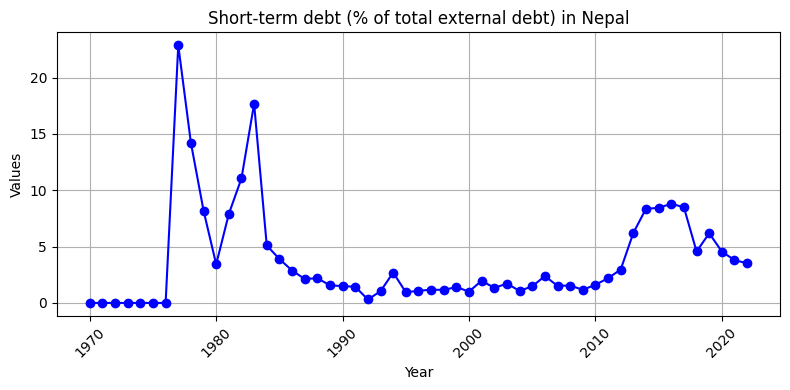

In [82]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 723)
plot_data(years, values, title)

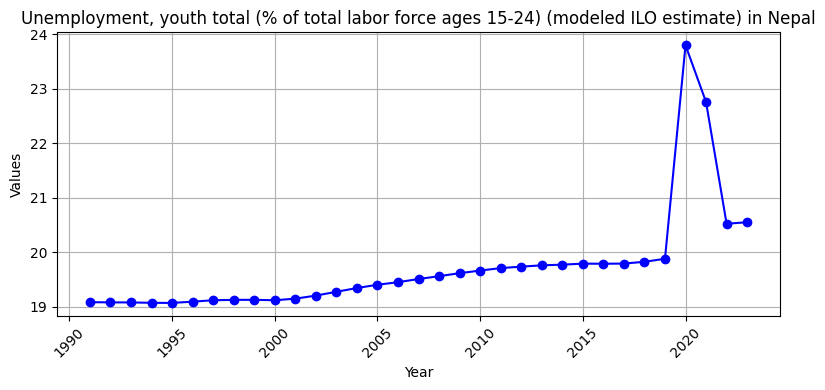

In [83]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 729)
plot_data(years, values, title)

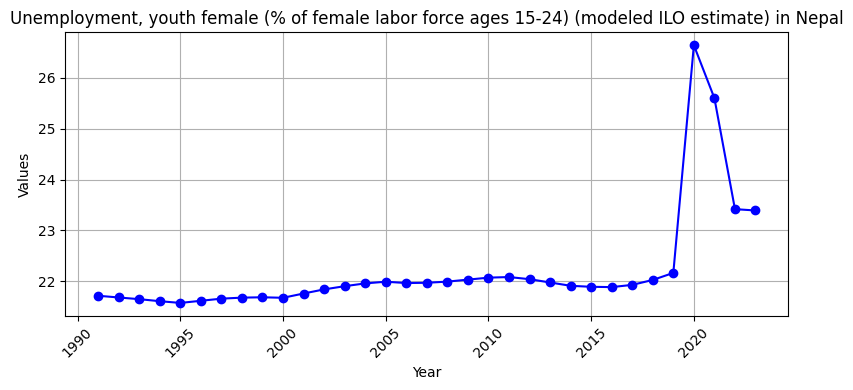

In [84]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 730)
plot_data(years, values, title)

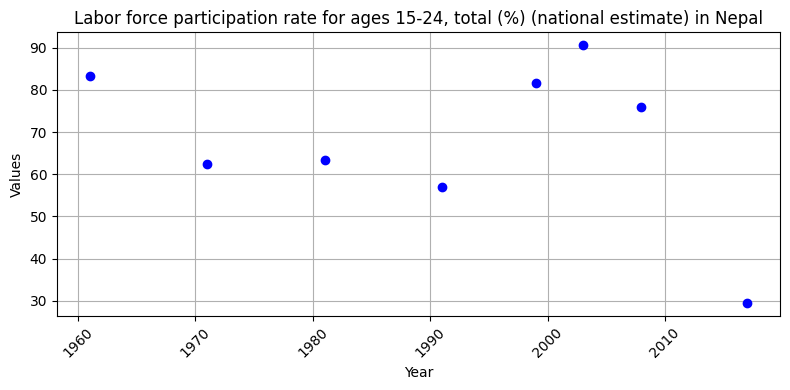

In [85]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 737)
plot_data(years, values, title)

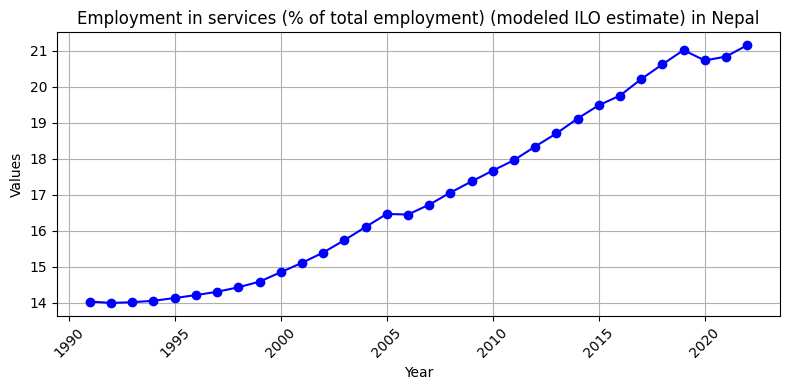

In [86]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 742)
plot_data(years, values, title)

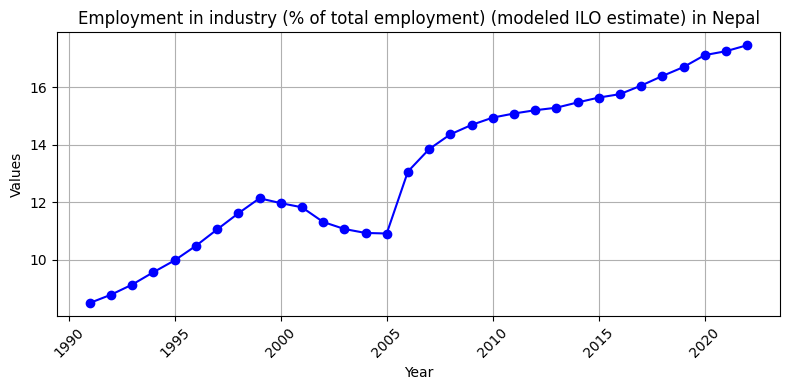

In [87]:
# Extract information for the current row
title, data, years, values = extract_row_info(df, 745)
plot_data(years, values, title)

In [88]:
# # Assuming you have defined the extract_row_info and plot_data functions

# # Loop through the first 100 indices of the 'Series Name' column
# for idx in df.index[:100]:
#     # Extract information for the current row
#     title, data, years, values = extract_row_info(df, idx)

#     # Plot the data
#     plot_data(years, values, title)


In [89]:
# import os

# # Define the output folder
# output_folder = '/content/output1'

# # Create the output folder if it doesn't exist
# os.makedirs(output_folder, exist_ok=True)

# # Loop through the first 100 indices of the 'Series Name' column
# for idx in df.index[:1336]:
#     # Extract information for the current row
#     title, data, years, values = extract_row_info(df, idx)

#     # Plot the data
#     plot_data(years, values, title)

#     # Display the plot
#     plt.show()




In [90]:
# import os

# # Define the output folder
# output_folder = '/content/output'

# # List all files in the output folder
# files_in_output = os.listdir(output_folder)

# # Delete files from the output folder
# for file_name in files_in_output:
#     file_path = os.path.join(output_folder, file_name)
#     os.remove(file_path)

# print("Files deleted successfully from the output folder.")


In [91]:
# import os

# # Define the output folder
# output_folder = '/content/output1'

# # Initialize a variable to count the files
# total_files = 0

# # Iterate through the output folder
# for item in os.listdir(output_folder):
#     item_path = os.path.join(output_folder, item)
#     if os.path.isfile(item_path):  # Check if it's a file
#         total_files += 1

# print("Total number of files in the output folder:", total_files)


In [92]:
# import shutil

# # Define the output folder
# output_folder = '/content/output1'

# # Define the name for the zip file
# zip_file_name = 'output_folder.zip'

# # Create a zip archive of the output folder
# shutil.make_archive('/content/' + zip_file_name, 'zip', output_folder)

# # Move the zip file to the root directory
# shutil.move('/content/' + zip_file_name + '.zip', '/content/' + zip_file_name)

# # Provide download link for the zip file
# print(f"Download the output folder from this link: /content/{zip_file_name}")

# # Remove the output folder and its contents
# shutil.rmtree(output_folder)

# print("Output folder and its contents removed.")
